Dataset:

https://www.kaggle.com/datamunge/sign-language-mnist/download

### Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
data_train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
data_test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

Now I will move to the task of data preparation for our machine learning model. First I will prepare the data then I will split the data into training and test sets:

In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)


training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


Now let’s have a look at the first 10 images in the dataset:

/tmp/ipykernel_32/1504929955.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


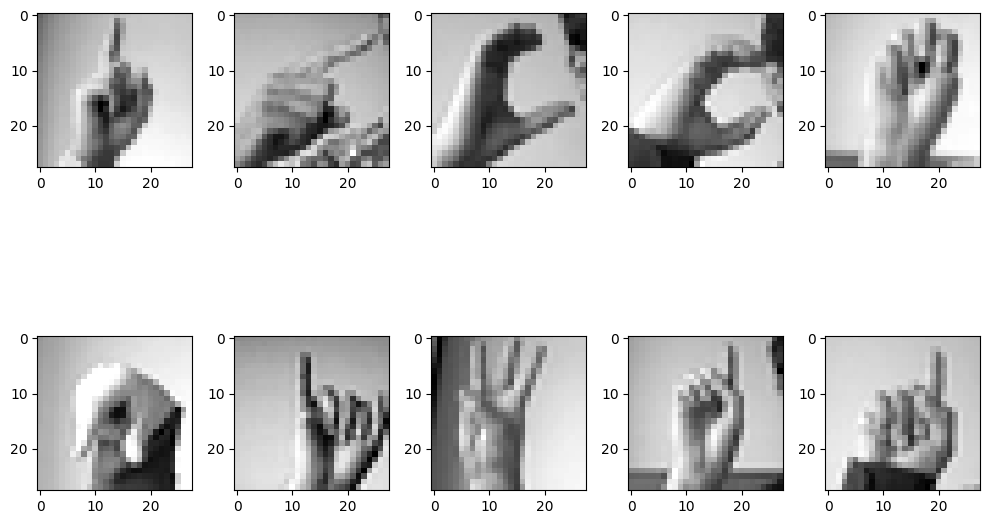

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5)
fig.set_size_inches(10,10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28,28),cmap = "gray")
        k += 1
    plt.tight_layout()

Now, I will create an ImageDataGenerator and do Image Augmentation of the dataset:

In [7]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


### Training Neural Network

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# train the model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                             steps_per_epoch=len(training_images)/32,
                             epochs=10,
                             validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                             validation_steps=len(testing_images)/32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10


/tmp/ipykernel_32/1419000904.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),


857/857 [==============================] - 24s 26ms/step - loss: 2.6342 - accuracy: 0.1962 - val_loss: 1.7712 - val_accuracy: 0.3813
Epoch 2/10
857/857 [==============================] - 23s 27ms/step - loss: 1.7940 - accuracy: 0.4306 - val_loss: 1.0727 - val_accuracy: 0.6315
Epoch 3/10
857/857 [==============================] - 22s 26ms/step - loss: 1.3672 - accuracy: 0.5541 - val_loss: 0.8517 - val_accuracy: 0.7009
Epoch 4/10
857/857 [==============================] - 22s 26ms/step - loss: 1.0881 - accuracy: 0.6426 - val_loss: 0.6023 - val_accuracy: 0.7719
Epoch 5/10
857/857 [==============================] - 22s 26ms/step - loss: 0.9272 - accuracy: 0.6928 - val_loss: 0.4813 - val_accuracy: 0.8332
Epoch 6/10
857/857 [==============================] - 22s 26ms/step - loss: 0.7928 - accuracy: 0.7373 - val_loss: 0.3892 - val_accuracy: 0.8625
Epoch 7/10
857/857 [==============================] - 22s 26ms/step - loss: 0.7073 - accuracy: 0.7662 - val_loss: 0.3622 - val_accuracy: 0.8648
Epo

[77.31316375732422, 0.7603179216384888]

Now let’s have a look at the accuracy and validation score of the model:

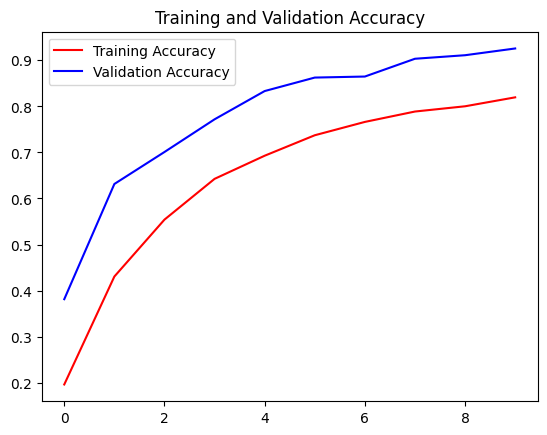

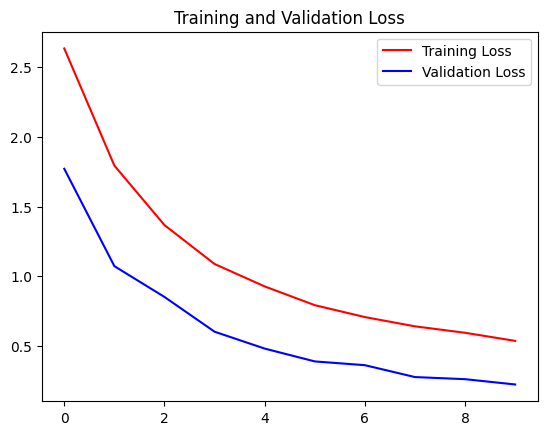

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc,'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r',label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

Now let’s make a classification report and test our model:

225/225 [==============================] - 2s 7ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

     Class 0       0.82      0.93      0.87       331
     Class 1       1.00      0.82      0.90       432
     Class 2       0.95      0.67      0.79       310
     Class 3       0.78      0.55      0.64       245
     Class 4       0.81      0.94      0.87       498
     Class 5       0.87      1.00      0.93       247
     Class 6       0.89      0.56      0.69       348
     Class 7       0.81      0.76      0.78       436
     Class 8       0.63      1.00      0.77       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.20      0.14      0.17       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.02      0.02      0.02       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

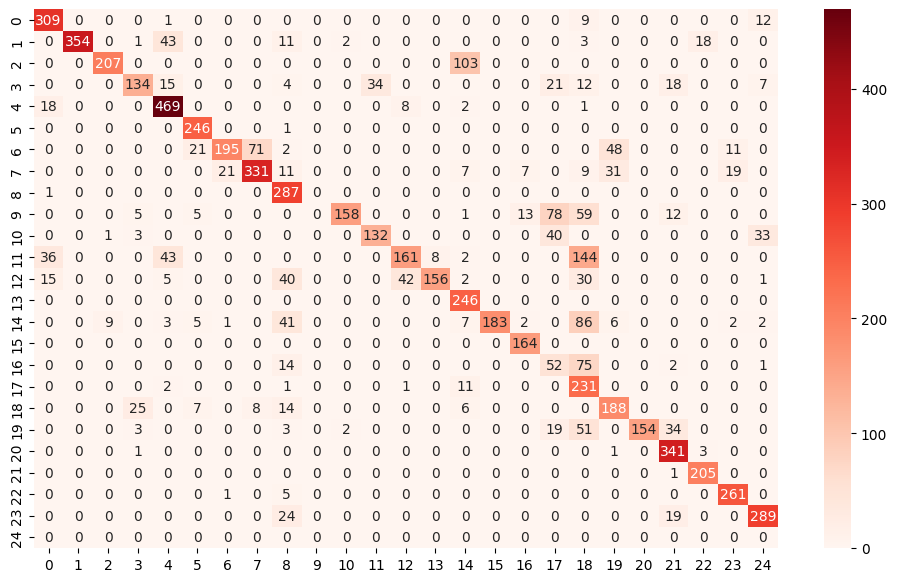

In [13]:
import seaborn as sns

# Predictions
predict_x=model.predict(testing_images) 
predictions=np.argmax(predict_x,axis=1)

for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names=classes))

# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
               fmt='')

Source:

https://thecleverprogrammer.com/2020/12/05/sign-language-classification-with-python/